In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy
import sklearn as sk
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline

In [8]:
dfwind = pd.read_csv(filepath_or_buffer='/Users/sofia/Desktop/Herramientas computacionales/ua-imec2001-hc-202310-s2/project/data/wind/wind.csv')


dfwind.head()

,timestamp,wind_speed_ms-1,temperature
0,2015-01-01 00:00:00,10.48,26.0
1,2015-01-01 01:00:00,10.40,26.1
2,2015-01-01 02:00:00,10.53,26.2
3,2015-01-01 03:00:00,10.52,26.2
4,2015-01-01 04:00:00,10.37,26.1


In [9]:
#Esta parte del codigo cambia los valores que sean =< 27 y >= 7 por 0
dfwind.loc[dfwind['temperature'] >= 27,'wind_speed_ms-1'] = 0
dfwind.loc[dfwind['temperature'] <= 10,'wind_speed_ms-1'] = 0
dfwind

,timestamp,wind_speed_ms-1,temperature
0,2015-01-01 00:00:00,10.48,26.0
1,2015-01-01 01:00:00,10.40,26.1
2,2015-01-01 02:00:00,10.53,26.2
3,2015-01-01 03:00:00,10.52,26.2
4,2015-01-01 04:00:00,10.37,26.1
...,...,...,...
26299,2017-12-31 19:00:00,7.44,25.1
26300,2017-12-31 20:00:00,7.72,25.0
26301,2017-12-31 21:00:00,7.98,25.2
26302,2017-12-31 22:00:00,6.77,25.6


In [10]:
#se comprueba que si se hallan cambiando los valores
chequeo = dfwind['temperature'] >= 27
print(dfwind[chequeo].head(2))

                timestamp  wind_speed_ms-1  temperature
3688  2015-06-03 16:00:00              0.0         27.1
3689  2015-06-03 17:00:00              0.0         27.2


In [30]:
def formato_grafica(titulo, ejex, ejey):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(None, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.legend(loc='center right')
    plt.tight_layout;

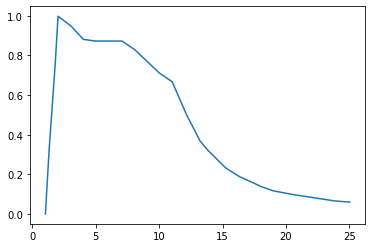

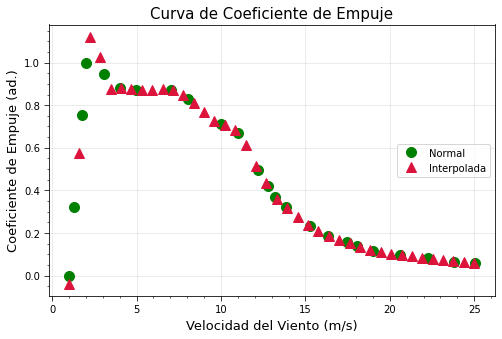

In [34]:
df_C_empuje = pd.read_csv('C:/Users/sofia/Desktop/project/wind/Coeficiente de empuje VS Velocidad Viento (corregido).csv')
#G1 = grafica 1
#G2 = grafica 2
plt.figure()
x_G1=df_C_empuje["x"].values
y_G1=df_C_empuje["y"].values
plt.plot(x_G1,y_G1)
plt.show()

df_C_empuje.head()

a=1
b=25

itp_spline = scipy.interpolate.splrep(x_G1, y_G1, k=3)
x_new = np.linspace(start=a, stop=b, num=40)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)

hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x_G1, y_G1, linestyle='', marker='o', color='green', ms=10, label='Normal')
plt.plot(x_new, y_new, linestyle='', marker='^', color='crimson', ms=10, label='Interpolada')

formato_grafica(titulo='Curva de Coeficiente de Empuje', 
                ejex='Velocidad del Viento (m/s)', 
                ejey='Coeficiente de Empuje (ad.)')

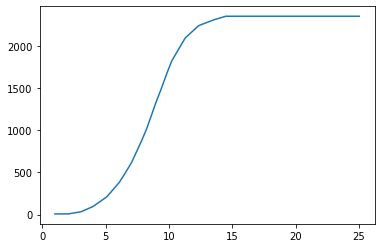

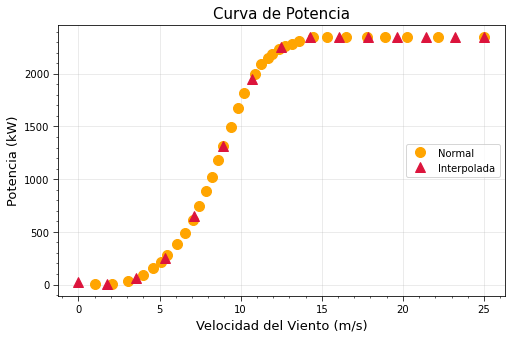

In [33]:

df_potencia = pd.read_csv('C:/Users/sofia/Desktop/project/wind/Potencia Vs velocidad viento (Corregido).csv')
"""
Como los valores se extrajeron de forma visual hay algunos que sobrepasan los máximos,
por eso se aplica la siguiente funcion que cambia todos los valroes que son mayores al máximo por 2350
"""
df_potencia.loc[df_potencia['y'] > 2350,'y'] = 2350
plt.figure()
x_G2=df_potencia["x"].values
y_G2=df_potencia["y"].values
plt.plot(x_G2,y_G2)
plt.show()

a=0
b=25

itp_spline = scipy.interpolate.splrep(x_G2, y_G2, k=3)
x_new = np.linspace(start=a, stop=b, num=15)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)

hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x_G2, y_G2, linestyle='', marker='o', color='orange', ms=10, label='Normal')
plt.plot(x_new, y_new, linestyle='', marker='^', color='crimson', ms=10, label='Interpolada')

formato_grafica(titulo='Curva de Potencia', 
                ejex='Velocidad del Viento (m/s)', 
                ejey='Potencia (kW)')

